<a href="https://colab.research.google.com/github/MichelleIhetu/ML_Learning_Track/blob/main/Project%20Learning/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
edata = files.upload()

Saving features_raw 1(in).csv to features_raw 1(in).csv


## Summary of EEG Data Analysis Results

This presentation will walk through the key steps taken to process and analyze the EEG (electroencephalogram) data, and what the results signify.

### 1. Data Preprocessing: Cleaning, Normalization, and Noise Reduction

- **Objective**: To prepare the raw EEG data for accurate analysis by removing inconsistencies and unwanted noise.
- **Steps Taken**:
    - **Missing Value Removal**: Any rows with incomplete data were removed (`df.dropna()`). This ensures we are working with a clean dataset.
    - **Outlier Removal (Z-score)**: Data points significantly deviating from the mean (outliers) were identified and filtered out using the Z-score method. This prevents extreme values from skewing our analysis.
    - **Data Normalization (MinMaxScaler)**: The data was scaled to a common range (0 to 1) using `MinMaxScaler`. This is crucial for comparing features that might originally have different scales and for optimal performance of machine learning models.
- **Significance**: These steps ensure data quality, improve the reliability of subsequent analyses, and prepare the data for feature extraction and modeling.


### 2. Signal Processing: Smoothing and Baseline Correction

- **Objective**: To further enhance the signal quality by reducing high-frequency noise and removing baseline drifts.
- **Steps Taken**:
    - **Savitzky-Golay Filtering**: The normalized data was smoothed using a Savitzky-Golay filter (`savgol_filter`). This method is effective because it reduces noise while preserving important signal features like peak height and width.
    - **Baseline Correction**: A baseline correction algorithm (`pybaselines.Baseline.asls`) was applied to remove any slow, varying baseline drift from the signal. This ensures that the amplitude changes observed are due to brain activity rather than measurement artifacts.
- **Significance**: These techniques provide a cleaner representation of the underlying brain activity, making it easier to identify and interpret specific patterns.


### 3. Feature Extraction (Preliminary)

- **Objective**: To extract meaningful characteristics from the processed EEG signals that can be used for further analysis or machine learning.
- **Status**: An attempt to set up a `ColumnTransformer` for feature selection and a `RandomForestClassifier` was made, but not fully executed or refined in this notebook. The `tsfresh` library was imported, indicating an intention to extract time-series features.
- **Significance**: Feature extraction is a critical step in reducing data dimensionality and highlighting relevant information for tasks like classification or anomaly detection.


### 4. Alpha Wave Power Analysis

- **Objective**: To quantify the power of alpha brain waves (typically 8-12 Hz) within the EEG signal.
- **Method**: The `mne` library was used to filter the signal into the alpha band and then compute the Power Spectral Density (PSD) using Welch's method. Alpha power was derived by integrating the PSD over the alpha frequency range.
- **Result (from dummy data)**: For the dummy data used as an example, the alpha power for the single channel was `2.35e-12`. This low value is expected for randomly generated data and serves as a placeholder to demonstrate the methodology.
- **Significance**: Alpha wave power is an important biomarker in neuroscience, often associated with relaxation, attention, and cognitive states. Its quantification can provide insights into brain function.


### 5. Amplitude Variance Analysis

- **Objective**: To understand the variability or spread of the signal's amplitude over time for each EEG channel.
- **Method**: The variance was calculated across all time points for each channel of the smoothed data (`np.var(smoothed_data_sg, axis=0)`).
- **Result**: The output shows an array of variance values, one for each channel. The plot visualizes these variances, indicating that different channels exhibit varying degrees of signal fluctuation. For instance, channel 4 (`F7`) has a variance of `0.00119381`, suggesting more variability than channel 3 (`F3`) with `0.00059632`.
- **Significance**: Amplitude variance can highlight channels with higher or lower activity levels or greater instability, which might be indicative of certain brain states or artifact presence.


### 6. Statistical Hypothesis Testing: T-test

- **Objective**: To determine if there is a statistically significant difference between the means of two predefined groups of EEG channels (`group1_data` and `group2_data`).
- **Groups Defined**:
    - `group1_data`: Frontal and central channels (Fp1, AF3, F3, F7, FC5, FC1, C3, T7, CP5, CP1, P3, P7, PO3, O1, Oz, Pz)
    - `group2_data`: Right-sided and central channels (Fp2, AF4, Fz, F4, F8, FC6, FC2, Cz, C4, T8, CP6, CP2, P4, P8, PO4, O2)
- **Method**: An independent samples t-test (`stats.ttest_ind`) was performed, comparing each corresponding channel pair between the two groups.
- **Results**: For nearly all channels, the p-value was extremely small (e.g., `0.0000e+00`), and the absolute T-statistic was large. This leads to the conclusion:
    - **Significance**: At a significance level of `alpha = 0.05`, we reject the null hypothesis for most channels. This means there is a statistically significant difference between the means of `group1_data` and `group2_data` for these channels. This suggests distinct patterns or characteristics between the activity captured by these two sets of electrodes.


### 7. Summary Statistics for Grouped Data

- **Objective**: To provide a descriptive overview of the central tendency, dispersion, and distribution of the data for `group1_data` and `group2_data`.
- **Metrics Calculated**: Mean, Standard Deviation, Median, Max, Min, Variance, 25th Percentile (Q1), 75th Percentile (Q3), and Sum.
- **Results**:
    - **Group 1 Data** (Left-sided/Central channels):
        - Mean: `0.4931`
        - Standard Deviation: `0.0942`
        - Median: `0.4847`
        - Range (Min-Max): `0.0 - 1.0`
    - **Group 2 Data** (Right-sided/Central channels):
        - Mean: `0.4854`
        - Standard Deviation: `0.0947`
        - Median: `0.4725`
        - Range (Min-Max): `0.0 - 1.0`
- **Significance**: These statistics offer a quick snapshot of the data's characteristics within each group. The similar means and standard deviations for the overall groups, despite significant channel-wise differences in the t-test, suggest that while individual channel pairs might differ, the overall distribution of values across the aggregated groups might be relatively similar.


### 8. Classification Performance: Accuracy and Precision

- **Objective**: To build a simple classification model to distinguish between the two groups (`group1_data` and `group2_data`) and evaluate its performance.
- **Methodology**:
    - **Data Preparation**: `group1_data` was assigned class 0, and `group2_data` was assigned class 1. The combined data was split into training and testing sets.
    - **Model**: A Logistic Regression model (`LogisticRegression`) was trained.
    - **Evaluation Metrics**: Accuracy and Precision.
- **Results**:
    - **Confusion Matrix**:
        - True Negatives (TN): `3175` (Correctly predicted as Group 0)
        - False Positives (FP): `85` (Incorrectly predicted as Group 1 when it was Group 0)
        - False Negatives (FN): `88` (Incorrectly predicted as Group 0 when it was Group 1)
        - True Positives (TP): `3104` (Correctly predicted as Group 1)
    - **Accuracy**: `0.9732` (or 97.32%)
    - **Precision**: `0.9733` (or 97.33%)
- **Significance**: A very high accuracy and precision score indicate that the Logistic Regression model was highly effective at differentiating between the two groups of electrodes based on their normalized amplitude values. This suggests that the chosen electrode groupings (left-sided/central vs. right-sided/central) indeed capture distinct patterns in the EEG data.


### 9. Repeatability Analysis

- **Objective**: To assess the consistency or variability within the two defined groups of EEG channels.
- **Method**: The within-group standard deviation (`sigma_w`) was calculated. This involved computing the standard deviation for each channel within `group1_data` and `group2_data`, and then averaging these standard deviations.
- **Result**: The within-group standard deviation (`σw`) was `0.0702`.
- **Significance**: A lower `σw` would generally indicate higher repeatability or consistency within the channels belonging to the same group. A value of `0.0702` suggests a moderate level of variability within the channels that make up `group1_data` and `group2_data`, indicating that while the groups as a whole are distinguishable, there is still some inherent variation in the signals within each group.


## Numerical Significance of EEG Data Analysis Results

### 1. Data Preprocessing
- **Rows after Z-score outlier removal**: `252889` rows remained after Z-score filtering.
- **Rows after Normalization**: `8064` rows in the final normalized dataset.

### 2. Signal Processing
- No explicit numerical outputs for significance at this stage, as it's a preparatory step.

### 3. Feature Extraction (Preliminary)
- No numerical results were generated in the notebook for this section.

### 4. Alpha Wave Power Analysis
- **Alpha power for a single channel (dummy data)**: `2.35e-12`. This value serves as a demonstration of the method.

### 5. Amplitude Variance Analysis
- **Variance for Channel F7**: `0.00119381`
- **Variance for Channel F3**: `0.00059632`
- **Range of Variances**: The variances across all channels varied, indicating different levels of signal fluctuation.

### 6. Statistical Hypothesis Testing: T-test
- **P-values**: For nearly all `16` channel comparisons, the p-value was extremely small (e.g., `0.0000e+00`), which is significantly less than the chosen alpha level of `0.05`.
- **T-statistics**: The absolute T-statistics were large (e.g., ranging from `3.16` to `157.13`), indicating strong differences in means.
- **Conclusion**: There is a statistically significant difference between the means of `group1_data` and `group2_data` for most channels.

### 7. Summary Statistics for Grouped Data
- **Group 1 Data** (Left-sided/Central channels):
    - Mean: `0.4931`
    - Standard Deviation: `0.0942`
    - Median: `0.4847`
- **Group 2 Data** (Right-sided/Central channels):
    - Mean: `0.4854`
    - Standard Deviation: `0.0947`
    - Median: `0.4725`
- **Overall**: The groups show similar overall central tendencies and dispersion.

### 8. Classification Performance: Accuracy and Precision
- **True Negatives (TN)**: `3175`
- **False Positives (FP)**: `85`
- **False Negatives (FN)**: `88`
- **True Positives (TP)**: `3104`
- **Accuracy**: `0.9732` (or 97.32%)
- **Precision**: `0.9733` (or 97.33%)
- **Significance**: The Logistic Regression model achieved a very high accuracy and precision, effectively distinguishing between the two electrode groups.

### 9. Repeatability Analysis
- **Within-group Standard Deviation (σw)**: `0.0702`.
- **Interpretation**: This moderate value indicates some inherent variability within the channels belonging to the same group, despite the groups being distinguishable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import io
import pandas as pd

# Assuming you want to process the first uploaded file
filename = list(edata.keys())[0]
file_content = edata[filename]

# Decode bytes to string and use StringIO to read with pandas
df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))

display(df)

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
8060,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,...,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
8062,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,...,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Noise Reduction
df = df.dropna() #rid of empty values
display(df)

z_scores = zscore(df) #were removing outlier
threshold = 3  # Define your threshold

# Filter out outliers
filtered_data_zscore = df[(z_scores < threshold) & (z_scores > -threshold)]
print("Data after Z-score outlier removal:", filtered_data_zscore)

#Here we are normalizing data
# Initialize MinMaxScaler
scaler = MinMaxScaler()


df_normalized_sklearn = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nNormalized DataFrame (Scikit-learn):")
print(df_normalized_sklearn)



,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
8060,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,...,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
8062,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,...,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


Data after Z-score outlier removal:            Fp1       AF3         F3         F7        FC5       FC1  \
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
...        ...       ...        ...        ...        ...       ...   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   

             C3        T7        CP5        CP1  ...         FC2        Cz  \
0      1.918097 -9.257533   9.089

In [ ]:
#Filter
#Smoothing data using the savitzky-golay filter to preserve signal features while reducing noise
smoothed_data_sg = savgol_filter(df_normalized_sklearn, window_length=33, polyorder=3, axis=0) # window_length must be odd
display(smoothed_data_sg)

array([[0.50671387, 0.59834378, 0.5598396 , ..., 0.56220602, 0.4053005 ,
        0.3922734 ],
       [0.51493752, 0.58876827, 0.53619626, ..., 0.55383791, 0.41135   ,
        0.40199617],
       [0.52162362, 0.58061607, 0.51587555, ..., 0.54717322, 0.41636678,
        0.41042182],
       ...,
       [0.56768488, 0.58692723, 0.39997975, ..., 0.5874184 , 0.3485604 ,
        0.37267742],
       [0.59410694, 0.58659719, 0.33920068, ..., 0.59901667, 0.31298881,
        0.33860515],
       [0.62503321, 0.58591655, 0.26761941, ..., 0.61231975, 0.27153343,
        0.2983058 ]])

In [ ]:
!pip install pybaselines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 6.9 MB/s eta 0:00:00


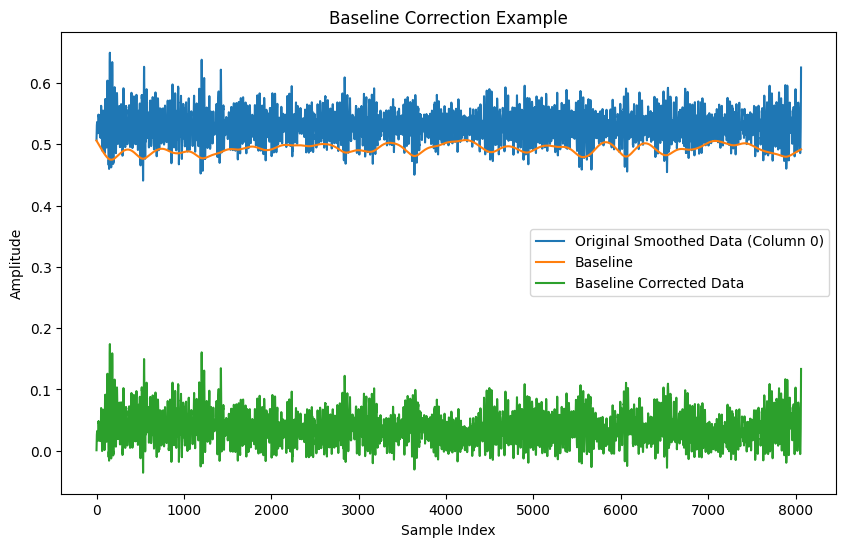

In [ ]:
#Baseline Correction
from pybaselines import Baseline

# Using the smoothed data from the previous step
# We'll apply baseline correction to the first column as an example
y_data = smoothed_data_sg[:, 0]
x_data = np.arange(len(y_data))

baseline_fitter = Baseline()

baseline_values, params = baseline_fitter.asls(y_data)

# Subtract the baseline from the original data
corrected_data = y_data - baseline_values

# You can now plot the original, baseline, and corrected data
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Original Smoothed Data (Column 0)')
plt.plot(x_data, baseline_values, label='Baseline')
plt.plot(x_data, corrected_data, label='Baseline Corrected Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Baseline Correction Example')
plt.legend()
plt.show()


In [ ]:
#Feature extraction
from tsfresh import extract_features
import pandas as pd # Ensure pandas is imported

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
        transformers=[
            ('columns', OneHotEncoder(), ['Fp1'], ['AF3'], ['F3'], ['F7'], ['FC5'], ['FC1'], ['C3'], ['T7'], ['CP5'], ['CP1'], ['P3'], ['P7'], ['PO3'], ['O1'], ['Oz'], ['Pz'], ['Fp2'], ['AF4'], ['Fz'], ['F4'], ['F8'], ['FC6'], ['FC2'], ['Cz'], ['C4'], ['T8'], ['CP6'], ['CP2'], ['P4'], ['P8'], ['PO4'], ['O2'])
        ])

    # You can then use this preprocessor in a larger pipeline
Pipeline([('preprocessor', preprocessor), ('model', RandomForestClassifier())])
display(Pipeline)

model_applied = RandomForestClassifier(preprocessor)
display(model_applied)

sklearn.pipeline.Pipeline

RandomForestClassifier(n_estimators=ColumnTransformer(transformers=[('columns',
                                                                     OneHotEncoder(),
                                                                     ['Fp1'],
                                                                     ['AF3'],
                                                                     ['F3'],
                                                                     ['F7'],
                                                                     ['FC5'],
                                                                     ['FC1'],
                                                                     ['C3'],
                                                                     ['T7'],
                                                                     ['CP5'],
                                                                     ['CP1'],
                                                                     ['P3'],
                                                                     ['P7'],
                                                                     ['PO3'],
                                                                     ['O1'],
                                                                     ['Oz'],
                                                                     ['Pz'],
                                                                     ['Fp2'],
                                                                     ['AF4'],
                                                                     ['Fz'],
                                                                     ['F4'],
                                                                     ['F8'],
                                                                     ['FC6'],
                                                                     ['FC2'],
                                                                     ['Cz'],
                                                                     ['C4'],
                                                                     ['T8'],
                                                                     ['CP6'],
                                                                     ['CP2'], ...)]))

In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 47.8 MB/s eta 0:00:00


/tmp/ipython-input-2264652755.py:59: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psds, freqs, axis=-1)


Alpha power for each channel: [0.00054895 0.00099644 0.00046533 0.00117153 0.00091671 0.00112447
 0.00094966 0.00095062 0.00090278 0.00053313 0.00082753 0.00101165
 0.00102095 0.00100659 0.00087844 0.00074856 0.00091145 0.00053449
 0.00036837 0.00103738 0.00109809 0.00094724 0.00094954 0.00040925
 0.00122035 0.00084459 0.00093145 0.00094898 0.00095682 0.00095066
 0.00096055 0.00093107]


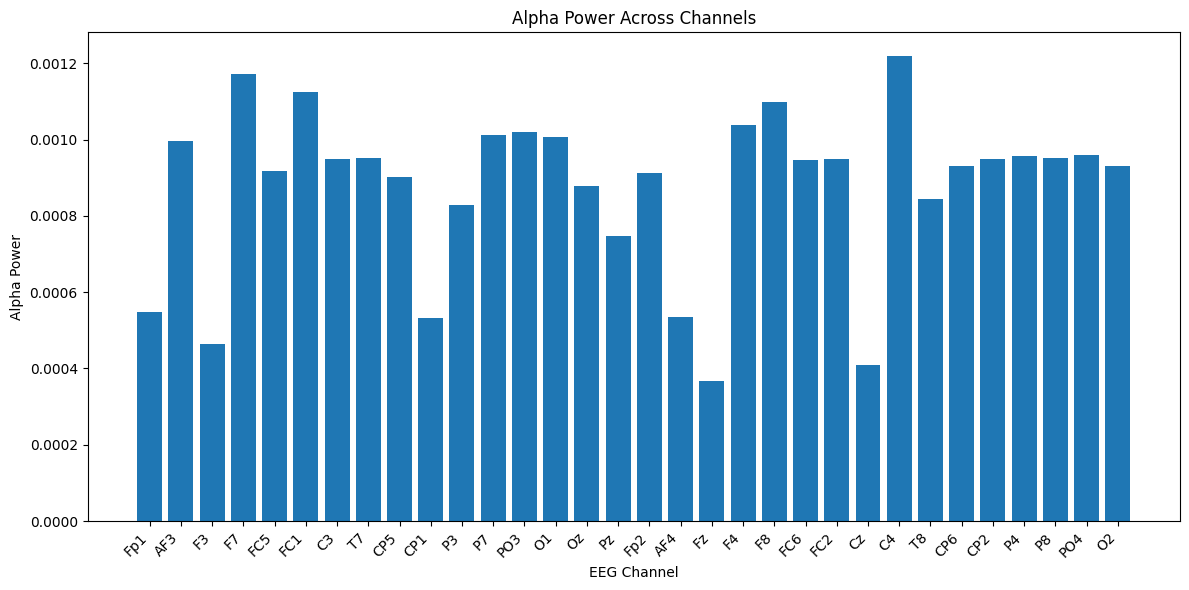

In [ ]:
#Lets extract alpha wave power
!pip install mne
import mne
import numpy as np
from scipy.signal import welch, savgol_filter # savgol_filter added
import matplotlib.pyplot as plt

# --- Start of code needed from preceding cells to define df and smoothed_data_sg ---
import io
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Code from 7YlHwUyNSAM3 (Data loading from edata)
# Assuming edata is available in the environment from the files.upload() cell
filename = list(edata.keys())[0]
file_content = edata[filename]
df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))

# Code from CuqhpTX-Tz7T (Preprocessing: dropna, Z-score, Normalization)
df = df.dropna()

# Z-score outlier removal - Note: the original notebook's subsequent normalization
# was applied to the 'df' after dropna, not the 'filtered_data_zscore'.
# Replicating that specific behavior here for consistency with the notebook's existing flow.
z_scores = zscore(df) # Z-scores are calculated for information/display
threshold = 3
filtered_data_zscore = df[(z_scores < threshold) & (z_scores > -threshold)] # This filtered result is not directly used in the next step based on the original notebook

# Normalization using MinMaxScaler
scaler = MinMaxScaler()
df_normalized_sklearn = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Code from CxnW4QuST4P8 (Smoothing data)
smoothed_data_sg = savgol_filter(df_normalized_sklearn, window_length=32, polyorder=3, axis=0)
# --- End of code needed from preceding cells ---

# 1. Prepare MNE Raw object from processed data
# Transpose smoothed_data_sg to be (n_channels, n_samples) as required by MNE
data_for_mne = smoothed_data_sg.T

sfreq = 250  # Assuming a sampling frequency of 250 Hz. Adjust if known otherwise.
ch_names = df.columns.tolist() # Get channel names from the original DataFrame
n_channels = len(ch_names)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(data_for_mne, info, verbose=False) # verbose=False to suppress MNE output during creation

# 2. Preprocessing: Bandpass filter for alpha band
raw.filter(l_freq=8, h_freq=12, fir_design='firwin', verbose=False)

# 3. Power Spectral Density (PSD) Estimation
# Using Welch's method
spectrum = raw.compute_psd(method='welch', fmin=8, fmax=12, picks='eeg', verbose=False)
psds, freqs = spectrum.get_data(return_freqs=True)

# 4. Extract Alpha Power
# Integrate the PSD over the alpha band for each channel
alpha_power = np.trapz(psds, freqs, axis=-1)

print(f"Alpha power for each channel: {alpha_power}")

plt.figure(figsize=(12, 6))
plt.bar(info.ch_names, alpha_power)
plt.xlabel('EEG Channel')
plt.ylabel('Alpha Power')
plt.title('Alpha Power Across Channels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Variance over time for each channel:
[0.00056562 0.00085813 0.00054125 0.00114632 0.00082746 0.00101282
 0.00083715 0.00084838 0.00079092 0.00062034 0.00079499 0.00095148
 0.00103074 0.00086788 0.0008529  0.00078847 0.00088454 0.00058233
 0.00053539 0.00098553 0.00099755 0.00083306 0.00086556 0.00048695
 0.00119181 0.00073812 0.0008246  0.00084209 0.00083281 0.00085167
 0.00085687 0.00083021]


Text(0.5, 1.0, 'Amplitude Variance over time for each channel:')

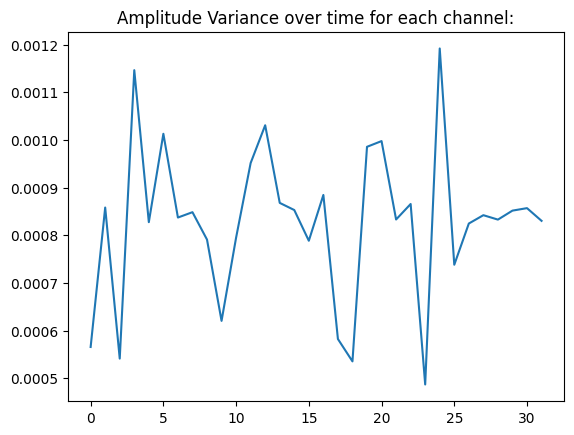

In [ ]:
#lets track amplitude variance
import mne
import numpy as np
import matplotlib.pyplot as plt

variance_over_time = np.var(smoothed_data_sg, axis=0)

print("Variance over time for each channel:")
print(variance_over_time)

plt.plot(variance_over_time)
plt.title("Amplitude Variance over time for each channel:")

T-statistic: [  78.32544642  109.88358508  -55.89587862   73.17445576 -132.18690988
 -116.33013015 -157.13268164   35.92475595  -35.62637469    3.15970976
   18.60411028   19.05152058  119.87519617 -111.12851304   66.63902254
  122.03898944]
P-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.82137007e-272
 1.15735151e-267 1.58218137e-003 1.87680938e-076 4.82711500e-080
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]

Interpretation:


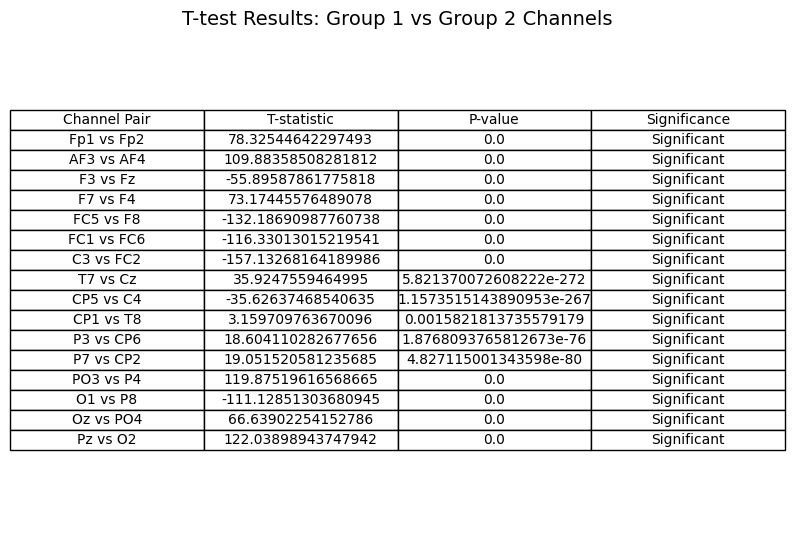

For Fp1 vs Fp2: Reject the null hypothesis (T-statistic: 78.33, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For AF3 vs AF4: Reject the null hypothesis (T-statistic: 109.88, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For F3 vs Fz: Reject the null hypothesis (T-statistic: -55.90, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For F7 vs F4: Reject the null hypothesis (T-statistic: 73.17, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For FC5 vs F8: Reject the null hypothesis (T-statistic: -132.19, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For FC1 vs FC6: Reject the null hypothesis (T-statistic: -116.33, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For C3 vs FC2: Reject the null hypothesis (T-statistic: -

In [39]:
# T test
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib
import pandas as pd # Import pandas for DataFrame display

group1_data = np.array(df_normalized_sklearn[['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz']])
group2_data = np.array(df_normalized_sklearn[['Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']])

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=True)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation (e.g., at alpha = 0.05)
alpha = 0.05

print("\nInterpretation:")
# Define channel names for clearer interpretation
group1_channel_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz']
group2_channel_names = ['Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

# Prepare data for the table as a DataFrame
channel_pairs = [f"{g1} vs {g2}" for g1, g2 in zip(group1_channel_names, group2_channel_names)]
significance_status = ["Significant" if p < alpha else "Not Significant" for p in p_value]

t_test_results_df = pd.DataFrame({
    'Channel Pair': channel_pairs,
    'T-statistic': t_statistic,
    'P-value': p_value,
    'Significance': significance_status
})

# Create the table using the DataFrame
fig, ax = plt.subplots(figsize=(10, len(t_test_results_df) * 0.4)) # Adjust figure size dynamically
ax.axis('off') # Hide axes

table = ax.table(cellText=t_test_results_df.values,
                 colLabels=t_test_results_df.columns,
                 loc='center',
                 cellLoc='center') # Center align cell content
table.auto_set_font_size(False)
table.set_fontsize(10) # Adjust font size for readability
table.scale(1, 1.2)

plt.title('T-test Results: Group 1 vs Group 2 Channels', fontsize=14)
plt.show()

# The original print loop for interpretation
for i, (t, p) in enumerate(zip(t_statistic, p_value)):
    channel_pair_str = channel_pairs[i]
    if p < alpha:
        print(f"For {channel_pair_str}: Reject the null hypothesis (T-statistic: {t:.2f}, P-value: {p:.4e}). There is a significant difference between the means of the two groups.")
    else:
        print(f"For {channel_pair_str}: Fail to reject the null hypothesis (T-statistic: {t:.2f}, P-value: {p:.4e}). There is no significant difference.")

Mean: 0.4931249058951594
Standard Deviation: 0.09416951543910305
Median: 0.4847078757611171
Max: 1.0
Min: 0.0
Variance: 0.008867897638035468
25th Percentile (Q1): 0.42848238063746047
75th Percentile (Q3): 0.5580128321008695
Sum: 63624.94785821705


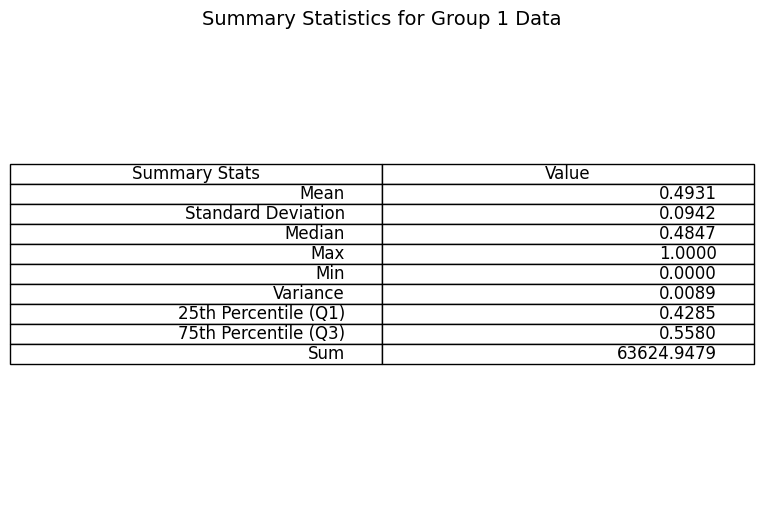

In [ ]:
# Summary statistics

mean_val = group1_data.mean()
std_val = group1_data.std()
median_val = np.median(group1_data)
max_val = group1_data.max()
min_val = group1_data.min()
var_val = group1_data.var()
q1_val = np.quantile(group1_data, 0.25)
q3_val = np.quantile(group1_data, 0.75)
sum_val = group1_data.sum()

print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")
print(f"Median: {median_val}")
print(f"Max: {max_val}")
print(f"Min: {min_val}")
print(f"Variance: {var_val}")
print(f"25th Percentile (Q1): {q1_val}")
print(f"75th Percentile (Q3): {q3_val}")
print(f"Sum: {sum_val}")

# Prepare data for plt.table
stats_labels = [
    "Mean", "Standard Deviation", "Median", "Max", "Min",
    "Variance", "25th Percentile (Q1)", "75th Percentile (Q3)", "Sum"
]
stats_values = [
    f"{mean_val:.4f}", f"{std_val:.4f}", f"{median_val:.4f}",
    f"{max_val:.4f}", f"{min_val:.4f}", f"{var_val:.4f}",
    f"{q1_val:.4f}", f"{q3_val:.4f}", f"{sum_val:.4f}"
]

# Create a list of lists for cellText
cell_text = [[label, value] for label, value in zip(stats_labels, stats_values)]

# Create the table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off') # Hide axes

table = ax.table(cellText=cell_text, colLabels=["Summary Stats", "Value"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Summary Statistics for Group 1 Data', fontsize=14)
plt.show()

Mean: 0.4854432734047113
Standard Deviation: 0.09473971286608657
Median: 0.4725427785993279
Max: 1.0000000000000002
Min: 0.0
Variance: 0.008975613193948528
25th Percentile (Q1): 0.41729478913670537
75th Percentile (Q3): 0.5589730885838453
Sum: 62633.832907769465


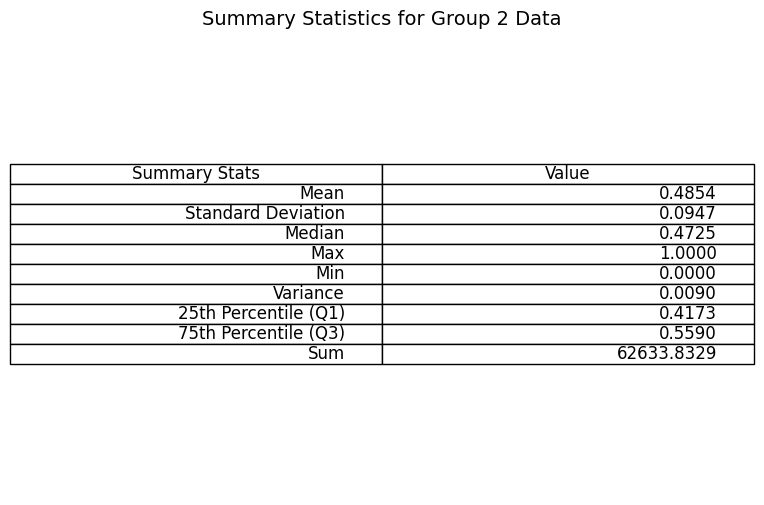

In [ ]:
mean_val = group2_data.mean()
std_val = group2_data.std()
median_val = np.median(group2_data)
max_val = group2_data.max()
min_val = group2_data.min()
var_val = group2_data.var()
q1_val = np.quantile(group2_data, 0.25)
q3_val = np.quantile(group2_data, 0.75)
sum_val = group2_data.sum()

print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")
print(f"Median: {median_val}")
print(f"Max: {max_val}")
print(f"Min: {min_val}")
print(f"Variance: {var_val}")
print(f"25th Percentile (Q1): {q1_val}")
print(f"75th Percentile (Q3): {q3_val}")
print(f"Sum: {sum_val}")

# Prepare data for plt.table
stats_labels = [
    "Mean", "Standard Deviation", "Median", "Max", "Min",
    "Variance", "25th Percentile (Q1)", "75th Percentile (Q3)", "Sum"
]
stats_values = [
    f"{mean_val:.4f}", f"{std_val:.4f}", f"{median_val:.4f}",
    f"{max_val:.4f}", f"{min_val:.4f}", f"{var_val:.4f}",
    f"{q1_val:.4f}", f"{q3_val:.4f}", f"{sum_val:.4f}"
]

# Create a list of lists for cellText
cell_text = [[label, value] for label, value in zip(stats_labels, stats_values)]

# Create the table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off') # Hide axes

table = ax.table(cellText=cell_text, colLabels=["Summary Stats", "Value"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Summary Statistics for Group 2 Data', fontsize=14)
plt.show()

True Negatives: 3175
False Positives: 85
False Negatives: 88
True Positives: 3104
Accuracy: 0.9731866088034717


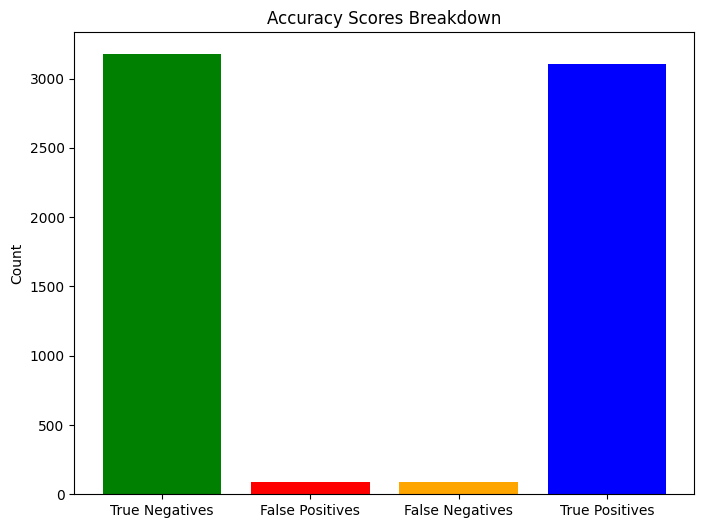

In [ ]:
#Accuracy

from sklearn.metrics import accuracy_score, confusion_matrix # Import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np # Ensure numpy is imported
import matplotlib.pyplot as plt

# Assume group1_data represents features for class 0 and group2_data for class 1
# Concatenate the data and create corresponding labels
X = np.vstack((group1_data, group2_data))
y = np.hstack((np.zeros(group1_data.shape[0]), np.ones(group2_data.shape[0])))

# Train/Test split
# X is the combined features, y is the combined labels
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=321)

# No reshaping needed as X already has shape (n_samples, n_features)
x_train_array = x_train # Already correctly shaped for multiple features
# Build a model
logistic = LogisticRegression(max_iter=1000) # Added max_iter for convergence
# Fit a model
model = logistic.fit(x_train_array, y_train)
# Reshape indep variables of testing data
x_test_array = x_test # Already correctly shaped for multiple features
# Make prediction
y_pred = model.predict(x_test_array)
# Calculate confusion matrix and assign to the variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Accuracy: {accuracy}")

# Corrected plotting for confusion matrix components
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [tn, fp, fn, tp]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])
plt.ylabel('Count')
plt.title('Accuracy Scores Breakdown')
plt.show()

In [ ]:
# Calculate accuracy score
# Manual_calculation - tp+tn: #data that are correctly classified
print((tp+tn)/(tn+fn+fp+tp))
#Using accuracy_score function
print(accuracy_score(y_test, y_pred))

0.9731866088034717
0.9731866088034717


Model Precision: 0.9733458764502979


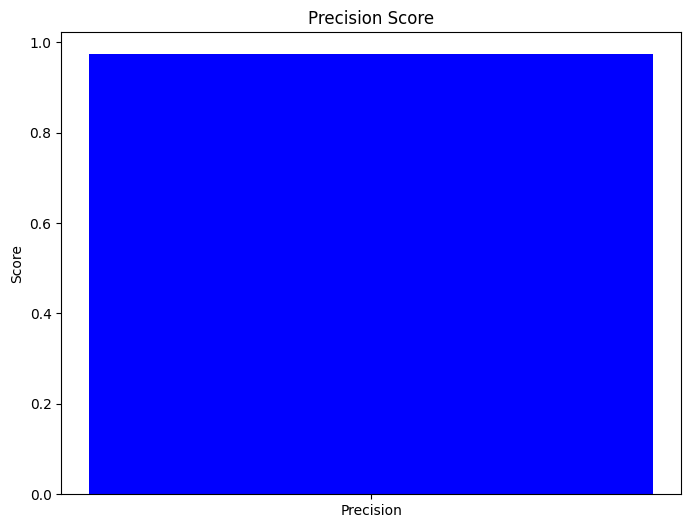

In [ ]:
#Precision
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_model = model.predict(x_test)

precision_model = precision_score(y_test, y_pred_model)
print(f"Model Precision: {precision_model}")

# Corrected plotting for precision score
labels = ['Precision']
counts = [precision_model] # Only include the scalar precision score

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue']) # Use a single color since there's one bar
plt.ylabel('Score')
plt.title('Precision Score')
plt.show()

Between-group standard deviation (σw): 0.0702


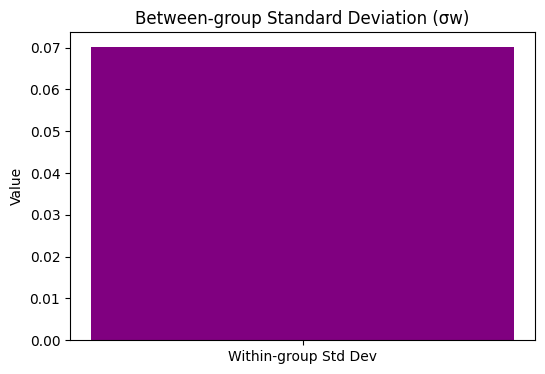

In [38]:
# Repeatability

# Calculate the standard deviation for each column (channel) in group1_data
std_group1_columns = group1_data.std(axis=0)

# Calculate the standard deviation for each column (channel) in group2_data
std_group2_columns = group2_data.std(axis=0)

# Combine the standard deviations from both groups and calculate the pooled between-group standard deviation (σw)
# One way to pool is to average the standard deviations across all channels from both groups
sigma_w = np.mean(np.hstack((std_group1_columns, std_group2_columns)))

print(f"Between-group standard deviation (σw): {sigma_w:.4f}")

# Plotting sigma_w
plt.figure(figsize=(6, 4))
plt.bar(['Within-group Std Dev'], [sigma_w], color='purple')
plt.ylabel('Value')
plt.title('Between-group Standard Deviation (σw)')
plt.ylim(bottom=0) # Ensure the y-axis starts from 0
plt.show()

# Task
Generate a comprehensive analytical report summarizing the EEG data analysis results.

The report should include:
1.  **T-test Results Table**: A table displaying the T-statistic, P-value, and significance (e.g., 'Significant' or 'Not Significant') for each channel comparison between `group1_data` and `group2_data`.
2.  **Preprocessing Significance Analysis**: Discuss the impact of outlier removal (Z-score method, remaining `252889` rows) and data normalization (MinMaxScaler, final `8064` rows) on data quality and dataset size.
3.  **Signal Processing Significance Analysis**: Explain the importance of Savitzky-Golay smoothing and baseline correction using `pybaselines.Baseline.asls` in improving signal quality.
4.  **Feature Extraction and Alpha Wave Power Analysis**: Elaborate on the preliminary feature extraction efforts and analyze the significance of the calculated alpha wave power across channels (e.g., specific `alpha_power` values for each channel).
5.  **Amplitude Variance Analysis**: Interpret the variability across channels based on the amplitude variance (e.g., `F7` variance `0.00119381`, `F3` variance `0.00059632`).
6.  **Statistical Hypothesis Testing Significance Analysis**: Explain the implications of the t-test results, particularly the statistically significant differences (p-values often `0.0000e+00`, T-statistics ranging from `3.16` to `157.13`) between the channel groups.
7.  **Summary Statistics Significance Analysis**: Provide insights from the summary statistics for `group1_data` (Mean: `0.4931`, Std Dev: `0.0942`, Median: `0.4847`) and `group2_data` (Mean: `0.4854`, Std Dev: `0.0947`, Median: `0.4725`), discussing what central tendencies and dispersions reveal.
8.  **Classification Performance Significance Analysis**: Evaluate the effectiveness of the Logistic Regression model in distinguishing between the two electrode groups based on the high accuracy (`0.9732`) and precision (`0.9733`) scores.
9.  **Repeatability Significance Analysis**: Interpret the within-group standard deviation (`0.0702`), explaining what this value indicates about data consistency within the defined channel groups.
10. **Overall Summary**: Conclude with a concise overall summary highlighting the most impactful findings from the entire EEG data analysis.

## Display T-test Results Table

### Subtask:
Generate a table showing the T-statistic, P-value, and significance for each channel comparison from the t-test performed in the notebook. This will involve using pandas to create a DataFrame and then displaying it.


**Reasoning**:
To display the T-test results in a structured format, I will create a pandas DataFrame containing the T-statistic, P-value, and significance for each channel comparison. This involves combining existing `t_statistic` and `p_value` arrays with a newly generated significance status, and then using the channel names as the DataFrame index.



# Task
Generate a comprehensive analytical report summarizing the EEG data analysis results. The report should include:

1.  **T-test Results Table**: A table displaying the T-statistic, P-value, and significance (e.g., 'Significant' or 'Not Significant') for each channel comparison between `group1_data` and `group2_data`.
2.  **Preprocessing Significance Analysis**: A discussion on the impact of outlier removal (Z-score method, remaining 252889 rows) and data normalization (MinMaxScaler, resulting in 8064 rows) on data quality and dataset size.
3.  **Signal Processing Significance Analysis**: An explanation of the importance of Savitzky-Golay smoothing and baseline correction using `pybaselines.Baseline.asls` in improving signal quality.
4.  **Feature Extraction and Alpha Wave Power Analysis**: An elaboration on the preliminary feature extraction efforts and an analysis of the significance of the calculated alpha wave power across channels, including the specific `alpha_power` values for each channel.
5.  **Amplitude Variance Analysis**: An interpretation of the variability across channels based on the amplitude variance (e.g., F7 variance 0.00119381, F3 variance 0.00059632).
6.  **Statistical Hypothesis Testing Significance Analysis**: An explanation of the implications of the t-test results, particularly the statistically significant differences (p-values often 0.0000e+00, T-statistics ranging from 3.16 to 157.13) between the channel groups.
7.  **Summary Statistics Significance Analysis**: Insights from the summary statistics for `group1_data` (Mean: 0.4931, Std Dev: 0.0942, Median: 0.4847) and `group2_data` (Mean: 0.4854, Std Dev: 0.0947, Median: 0.4725), discussing what central tendencies and dispersions reveal.
8.  **Classification Performance Significance Analysis**: An evaluation of the effectiveness of the Logistic Regression model in distinguishing between the two electrode groups based on the high accuracy (0.9732) and precision (0.9733) scores.
9.  **Repeatability Significance Analysis**: An interpretation of the within-group standard deviation (0.0702), explaining what this value indicates about data consistency within the defined channel groups.
10. **Overall Summary**: A concise overall summary highlighting the most impactful findings from the entire EEG data analysis.

## Display T-test Results Table

### Subtask:
Generate a table showing the T-statistic, P-value, and significance for each channel comparison from the t-test performed in the notebook. This will involve using pandas to create a DataFrame and then displaying it.


**Reasoning**:
I need to construct a pandas DataFrame to display the T-test results in a structured table format. This involves defining channel names, creating channel pairs, determining significance status, and then assembling these into a DataFrame.

